# 다중 클래스 로지스틱 회귀
 - 세상에는 발화한다, 안 한다라는 두 가지 패턴만 있지는 않습니다. 하지만 패턴이 여러가지일 가능성이 있습니다. 예를 들어 내일 날씨는 맑다, 안 맑다 두 가지 경우가 아닌 비가 온다, 눈이 온다 등 여러가지 선택지가 있을 수 있습니다. 이러한 선택지를 클래스라 합니다. 이전의 두 가지 패턴에 대한 분류를 이진분류라하고 그 이상의 클래스를 분류하는 것을 다중 클래스분류하고 합니다.
 - 단순 퍼셉트론이나 로지스틱 회귀만으로는 다중 클래스분류를 할 수 없습니다. 여기서 활성화 함수를 시그모이드 함수에서 소프트맥스 함수로 바꾸면 다중 클래스분류를 할 수 있습니다.
 - 소프트맥스(softmax)함수란 n차원의 백터에 대하여 softmax(x)i = exp(xi) / sigma(j=1 부터 j=n까지)(exp(xj))로 나타내는 함수입니다. 쉽게 말해 각 데이터값을 자연상수 e의 승으로 치환한 후 각 데이터의 확률로 바꾼 함수입니다.
 - 이 방법도 경사하강법을 적용하여 문제를 풉니다.
 - (E를 W로 미분한 값) = -sigma(n=1부터 n=N까지)(tn-yn)*xn
 - (E를 b로 미분한 값) = -sigma(n=1부터 n=N까지)(tn-yn)

# 구현
 - 입력이 두 개, 출력이 세 개이며 세 개의 클래스로 분류하는 로지스틱 회귀
 - 각 클래스의 데이터는 평균 u != 0인 정규분포를 따르는 샘플 데이터군을 생성해서 적용
 - 각 클래스의 데이터 수는 100개, 모두 300개의 데이터를 분류

In [11]:
from sklearn.utils import shuffle # 데이터를 무작위로 섞어주는 라이브러리, 미니배치 확률 경사하강법을 이용할 것임.
import tensorflow as tf

In [12]:
M = 2 # 입력 데이터 차원
K = 3 # 클레스 수
n = 100 # 각 클래스에 있는 데이터 수
N = n * K # 전체 데이터 수

In [13]:
# 샘플 데이터 군
# np.random.randn(a,b)는 평균이 0이고 표준편차가 1인 표준정규분포를 따르는 무작위 aXb행렬 생성
X1 = np.random.randn(n, M) + np.array([0,10])
X2 = np.random.randn(n, M) + np.array([5,5])
X3 = np.random.randn(n, M) + np.array([10,0])
Y1 = np.array([[1,0,0] for i in range(n)])
Y2 = np.array([[0,1,0] for i in range(n)])
Y3 = np.array([[0,0,1] for i in range(n)])

X = np.concatenate((X1, X2, X3), axis=0)
Y = np.concatenate((Y1, Y2, Y3), axis=0)

In [14]:
W = tf.Variable(tf.zeros([M,K]))
b = tf.Variable(tf.zeros([K]))

x = tf.placeholder(tf.float32, shape=[None, M])
t = tf.placeholder(tf.float32, shape=[None, K])
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [16]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(t * tf.log(y), reduction_indices=[1])) # cross entropy error function
# tf.reduce_mean는 tf행렬의 평균을 구해주는 메소드
# 인자 1개만 들어가면 전체 원소의 평균을 return해주고 2번째 인자가 0이면 열에 대한 평균, 1이면 행에 대한 평균을 행렬로 return해줌.
# reduction_indices는 행렬의 합을 어느 방향으로 구할지를 나타냄.

In [17]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy) # 미니배치 확률 경사하강법

In [18]:
init = tf.global_variables_initializer() # 세션 초기화, 저번에도 말했지만 tf는 session이라는 객체 안에서 계산을 수행
sess = tf.Session()
sess.run(init)

In [22]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t, 1)) # argmax()함수는 tf배열 내에서 가장 큰 원소의 인덱스를 return합니다.
# 즉, 제대로 학습이 되었는지 확인할 수 있는 답지임.

In [23]:
batch_size = 50 # 배치 사이즈
n_batches = N

In [24]:
for epoch in range(20):
    X_, Y_ = shuffle(X, Y)
    
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        
        sess.run(train_step, feed_dict={
            x: X_[start:end],
            t: Y_[start:end]
        })
# 학습

In [25]:
X_, Y_ = shuffle(X, Y)

classified = correct_prediction.eval(session=sess, feed_dict={
    x: X_[0:10],
    t: Y_[0:10]
    
})
prob = y.eval(session=sess, feed_dict={
    x: X_[0:10]
})

print('classified:')
print(classified)
print()
print('output probability:')
print(prob)
# 학습 결과

classified:
[ True  True  True  True  True  True  True  True  True  True]

output probability:
[[1.06621988e-03 9.93874133e-01 5.05969673e-03]
 [2.12806859e-03 9.95363712e-01 2.50811013e-03]
 [5.54026337e-03 9.87906098e-01 6.55367272e-03]
 [9.99891281e-01 1.08678025e-04 2.68042749e-13]
 [5.11097685e-02 9.45928335e-01 2.96189403e-03]
 [1.29384317e-08 5.75832874e-02 9.42416668e-01]
 [9.99967337e-01 3.26193513e-05 2.38608961e-14]
 [1.09350597e-02 9.88734007e-01 3.30915209e-04]
 [9.98049259e-01 1.95070973e-03 2.31137713e-11]
 [1.01137273e-01 8.97287428e-01 1.57542748e-03]]


# 케라스로 구현

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(input_dim=M, units=K))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1))

In [31]:
minibatch_size = 50
model.fit(X, Y, epochs=20, batch_size=minibatch_size)




Epoch 1/20
300/300 [==============================] - 0s 423us/step - loss: 0.2803
Epoch 2/20
300/300 [==============================] - 0s 23us/step - loss: 0.0819
Epoch 3/20
300/300 [==============================] - 0s 27us/step - loss: 0.0582
Epoch 4/20
300/300 [==============================] - 0s 23us/step - loss: 0.0509
Epoch 5/20
300/300 [==============================] - 0s 23us/step - loss: 0.0461
Epoch 6/20
300/300 [==============================] - 0s 23us/step - loss: 0.0429
Epoch 7/20
300/300 [==============================] - 0s 23us/step - loss: 0.0403
Epoch 8/20
300/300 [==============================] - 0s 27us/step - loss: 0.0385
Epoch 9/20
300/300 [==============================] - 0s 30us/step - loss: 0.0362
Epoch 10/20
300/300 [==============================] - 0s 23us/step - loss: 0.0347
Epoch 11/20
300/300 [==============================] - 0s 27us/step - loss: 0.0340
Epoch 12/20
300/300 [==============================] - 0s 23us/step - loss: 0.0324
Epoch 13/

In [32]:
X_, Y_ = shuffle(X, Y)
classes = model.predict_classes(X_[0:10], batch_size=minibatch_size)
prob = model.predict_proba(X_[0:10], batch_size=minibatch_size)
print('classified:')
print(np.argmax(model.predict(X_[0:10]), axis=1) == classes)
print()
print('output probability:')
print(prob)

classified:
[ True  True  True  True  True  True  True  True  True  True]

output probability:
[[2.2330228e-03 9.9531758e-01 2.4494338e-03]
 [9.9314511e-01 6.8548936e-03 4.7544978e-11]
 [9.9489295e-01 5.1070182e-03 3.0563277e-10]
 [9.7762364e-01 2.2376383e-02 1.2953968e-09]
 [9.7701615e-01 2.2983847e-02 3.8403867e-09]
 [2.1078606e-09 1.3669038e-02 9.8633099e-01]
 [6.9299555e-10 2.9589464e-03 9.9704105e-01]
 [1.0064884e-11 3.1711280e-04 9.9968290e-01]
 [7.6540776e-02 9.2203802e-01 1.4211730e-03]
 [9.9284726e-01 7.1528098e-03 3.5211939e-10]]


# 다층 퍼셉트론
 - 지금까지는 선형분류를 통해 데이터를 분류가 가능한 케이스들만 다뤄봤지만 세상에 있는 데이터들은 선형분류를 통해 분류할 수 없는 것들이 존재 합니다. 대표적인 에가 XOR게이트 입니다. XOR게이트를 그래프로 나타냈을 때, 출력값을 기준으로 직선 딱 한개로는 나눌 수가 없습니다. 최소 2개의 직선이나 곡선이 필요합니다. 이제껏 직선 한 개로 데이터 분류하는 것을 선형분리가능이라 하고 XOR같은 것들은 선형분리불가능이라고 합니다. 한번 XOR게이트를 OR게이트 처럼 로지스틱 회귀로 분류해보겠습니다.

In [28]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

np.random.seed(0)

# XOR 게이트
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [0]])

model = Sequential([
    Dense(input_dim=2, output_dim=1),
    Activation('sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
model.fit(X, Y, epochs=200, batch_size=1)

prob = model.predict_proba(X, batch_size=1)
print(prob)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=2, units=1)`
  del sys.path[0]





Epoch 1/200
4/4 [==============================] - 0s 72ms/step - loss: 0.8427
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 0.8205
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 0.8049
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7924
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7822
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7754
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7688
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7622
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7578
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7555
Epoch 11/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7520
Epoch 12/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7497
Epoch 13/200
4/4 [==============================] - 0s 3m

4/4 [==============================] - 0s 2ms/step - loss: 0.7200
Epoch 98/200
4/4 [==============================] - 0s 1000us/step - loss: 0.7203
Epoch 99/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7203
Epoch 100/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7195
Epoch 101/200
4/4 [==============================] - 0s 5ms/step - loss: 0.7201
Epoch 102/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7194
Epoch 103/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7190
Epoch 104/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7200
Epoch 105/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7199
Epoch 106/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7193
Epoch 107/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7199
Epoch 108/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7192
Epoch 109/200
4/4 [==============================] - 

4/4 [==============================] - 0s 2ms/step - loss: 0.7184
Epoch 200/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7190
[[0.50147235]
 [0.5029856 ]
 [0.5004145 ]
 [0.5019278 ]]


 - 선형분류를 통한 로지스틱 회귀를 사용했을 떄, 학습에 실패한 것을 확인할 수 있습니다.
 - 선형분리가능한 문제에만 적용할 수 있는 모델을 선형 분류기(linear classifier)이라 합니다.

# 게이트 조합
 - XOR게이트같은 경우는 선형분리가능한 게이트의 조합으로 나타낼 수 있습니다.
 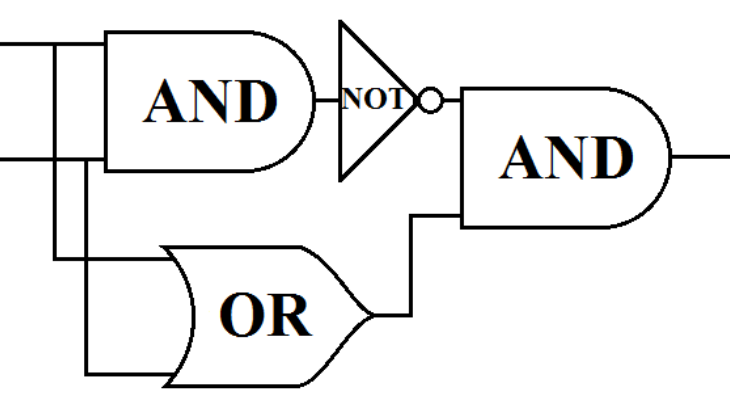
 - 즉, 기본 게이트 각각을 뉴런으로 구현할 수 있으므로 뉴런을 조합하여 비선형분류를 실행할 수 있는 모델을 만들 수 있음을 의미합니다.
 - 이런식으로 입력과 출력 이외의 뉴런이 연결된 모델을 다층 퍼셉트론(multi-layer perceptron 줄여서 MLP)라 부릅니다.
 - 입력을 받는 층을 입력층(input layer), 출력하는 층을 출력층(output layer), 입력층과 출력층 사이에 추가된 층을 은닉층(hidden layer).

# 오차역전파법
 - 지금까지는 모델의 출력을 생각할 떄, 입력층에서 출력으로 향하는 순방향으로 네트워크를 따라가며 봤지만, 경사를 생각할 때, 네트워크 방향을 역방향으로 보면 오차(모델을 계산해서 나온 출려과 정답인 값과의 순수한 오차)가 네트워크에 전파된다고 볼 수 있습니다. 네트워크가 여러 층으로 구성된 경우에는 경사를 계산하기 위해 역방향으로 출력된다고 생각해야 합니다. 이를 오차역전파법이라 합니다.
 - 오차역전파법은 모든 딥러닝 모델에 사용되는 기법이라고 해도 과언이 아닙니다.
 - 기본적으로 오차함수를 최소화하기 위해 경사를 계산한다고 개념을 잡아두시면 됩니다.

# 구현
 - 다층 퍼셉트론을 통해 XOR게이트를 구현해보도록 하겠습니다.

In [46]:
import tensorflow as tf
import numpy as np

In [47]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [0]])

In [48]:
x = tf.placeholder(tf.float32, shape=[None, 2])
t = tf.placeholder(tf.float32, shape=[None, 1])

In [49]:
W = tf.Variable(tf.truncated_normal([2,2]))
b = tf.Variable(tf.zeros([2]))
h = tf.nn.sigmoid(tf.matmul(x, W) + b)
# tf.truncated_normal()은 절단정규분포를 따르는 데이터를 생성하는 메소드
# tf.zeros로 생성하게 되면 오차역전파법을 적용했을 때, 오차가 제대로 반영되지 않을 경우가 있기 때문에 사용합니다.

In [50]:
V = tf.Variable(tf.truncated_normal([2,1]))
c = tf.Variable(tf.zeros([1]))
y = tf.nn.sigmoid(tf.matmul(h, V) + c)

In [51]:
cross_entropy = - tf.reduce_sum(t * tf.log(y) + (1-t) * tf.log(1-y))

In [52]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)

In [53]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [54]:
for epoch in range(4000):
    sess.run(train_step, feed_dict={
        x: X,
        t: Y
    })
    if epoch % 1000 == 0:
        print('epoch:', epoch)

epoch: 0
epoch: 1000
epoch: 2000
epoch: 3000


In [55]:
classified = correct_prediction.eval(session=sess, feed_dict={
    x: X,
    t: Y
})
prob = y.eval(session=sess, feed_dict={
    x: X
})

print('classified:')
print(classified)
print()
print('output probability:')
print(prob)

classified:
[[ True]
 [ True]
 [ True]
 [ True]]

output probability:
[[0.01832211]
 [0.97646666]
 [0.9758964 ]
 [0.01613629]]


# 케라스로 구현
 - 케라스는 model.add()기능이 있으니 층을 추가하는 데 있어 용이합니다.

In [61]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [62]:
model = Sequential()

# 입력층 ~ 은닉층
model.add(Dense(input_dim=2, units=2)) # units은 layer안에 있는 노드 수를 의미함, Dense(2, imput_dim=2)와 같이 units=는 생략가능
model.add(Activation('sigmoid'))

# 은닉층 ~ 출력층
model.add(Dense(units=1)) # Dense(1)
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))

In [63]:
model.fit(X, Y, epochs=4000, batch_size=4)

Epoch 1/4000
4/4 [==============================] - 0s 43ms/step - loss: 0.7506
Epoch 2/4000
4/4 [==============================] - 0s 500us/step - loss: 0.7457
Epoch 3/4000
4/4 [==============================] - 0s 250us/step - loss: 0.7412
Epoch 4/4000
4/4 [==============================] - 0s 500us/step - loss: 0.7371
Epoch 5/4000
4/4 [==============================] - 0s 500us/step - loss: 0.7333
Epoch 6/4000
4/4 [==============================] - 0s 500us/step - loss: 0.7298
Epoch 7/4000
4/4 [==============================] - 0s 250us/step - loss: 0.7267
Epoch 8/4000
4/4 [==============================] - 0s 750us/step - loss: 0.7238
Epoch 9/4000
4/4 [==============================] - 0s 250us/step - loss: 0.7212
Epoch 10/4000
4/4 [==============================] - 0s 250us/step - loss: 0.7188
Epoch 11/4000
4/4 [==============================] - 0s 500us/step - loss: 0.7166
Epoch 12/4000
4/4 [==============================] - 0s 250us/step - loss: 0.7146
Epoch 13/4000
4/4 [=======

Epoch 102/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6939
Epoch 103/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6939
Epoch 104/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6939
Epoch 105/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6939
Epoch 106/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6938
Epoch 107/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6938
Epoch 108/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6938
Epoch 109/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6938
Epoch 110/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6938
Epoch 111/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6938
Epoch 112/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6938
Epoch 113/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6938
Epoch 

4/4 [==============================] - 0s 1ms/step - loss: 0.6937
Epoch 202/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6937
Epoch 203/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6937
Epoch 204/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6937
Epoch 205/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6937
Epoch 206/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6937
Epoch 207/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6937
Epoch 208/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6937
Epoch 209/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6937
Epoch 210/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6937
Epoch 211/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6937
Epoch 212/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6937
Epoch 213/4000
4/4 [=====

Epoch 301/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6936
Epoch 302/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6936
Epoch 303/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6936
Epoch 304/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6936
Epoch 305/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6936
Epoch 306/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6936
Epoch 307/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6936
Epoch 308/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6936
Epoch 309/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6936
Epoch 310/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6936
Epoch 311/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6936
Epoch 312/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6936
Epoc

Epoch 400/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6935
Epoch 401/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6935
Epoch 402/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6935
Epoch 403/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6935
Epoch 404/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6935
Epoch 405/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6935
Epoch 406/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6935
Epoch 407/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6935
Epoch 408/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6935
Epoch 409/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6935
Epoch 410/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6935
Epoch 411/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6935
Epoc

Epoch 499/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6934
Epoch 500/4000
4/4 [==============================] - 0s 0us/step - loss: 0.6934
Epoch 501/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6934
Epoch 502/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6934
Epoch 503/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6934
Epoch 504/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6934
Epoch 505/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6934
Epoch 506/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6934
Epoch 507/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6934
Epoch 508/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6934
Epoch 509/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6934
Epoch 510/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6934
Epoch 

Epoch 598/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6934
Epoch 599/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6934
Epoch 600/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6934
Epoch 601/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6934
Epoch 602/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6934
Epoch 603/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6934
Epoch 604/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6934
Epoch 605/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6934
Epoch 606/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6934
Epoch 607/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6934
Epoch 608/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6934
Epoch 609/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6934
Epoch 

Epoch 697/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6933
Epoch 698/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6933
Epoch 699/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6933
Epoch 700/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6933
Epoch 701/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6933
Epoch 702/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6933
Epoch 703/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6933
Epoch 704/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6933
Epoch 705/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6933
Epoch 706/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6933
Epoch 707/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6933
Epoch 708/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6933
Epoch 70

Epoch 796/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6933
Epoch 797/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6933
Epoch 798/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6933
Epoch 799/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6933
Epoch 800/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6933
Epoch 801/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6933
Epoch 802/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6933
Epoch 803/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6933
Epoch 804/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6933
Epoch 805/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6933
Epoch 806/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6933
Epoch 807/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6932
Epoc

Epoch 895/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6932
Epoch 896/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6932
Epoch 897/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6932
Epoch 898/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6932
Epoch 899/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6932
Epoch 900/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6932
Epoch 901/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6932
Epoch 902/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 903/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6932
Epoch 904/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6932
Epoch 905/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6932
Epoch 906/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6932
Epoch 

Epoch 994/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6932
Epoch 995/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6932
Epoch 996/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6932
Epoch 997/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6932
Epoch 998/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 999/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6932
Epoch 1000/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6932
Epoch 1001/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6932
Epoch 1002/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6932
Epoch 1003/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6932
Epoch 1004/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6932
Epoch 1005/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6931


Epoch 1092/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6931
Epoch 1093/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6931
Epoch 1094/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6931
Epoch 1095/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6931
Epoch 1096/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6931
Epoch 1097/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6931
Epoch 1098/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6931
Epoch 1099/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6931
Epoch 1100/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6931
Epoch 1101/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6931
Epoch 1102/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6931
Epoch 1103/4000
4/4 [==============================] - 0s 250us/step - loss:

Epoch 1190/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6931
Epoch 1191/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6931
Epoch 1192/4000
4/4 [==============================] - 0s 1000us/step - loss: 0.6931
Epoch 1193/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6931
Epoch 1194/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6931
Epoch 1195/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6931
Epoch 1196/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6931
Epoch 1197/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 1198/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6931
Epoch 1199/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6931
Epoch 1200/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6931
Epoch 1201/4000
4/4 [==============================] - 0s 500us/step - loss: 

Epoch 1288/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6930
Epoch 1289/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6930
Epoch 1290/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6930
Epoch 1291/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6930
Epoch 1292/4000
4/4 [==============================] - 0s 1000us/step - loss: 0.6930
Epoch 1293/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6930
Epoch 1294/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6930
Epoch 1295/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6930
Epoch 1296/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6930
Epoch 1297/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6930
Epoch 1298/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6930
Epoch 1299/4000
4/4 [==============================] - 0s 500us/step - loss

Epoch 1386/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6929
Epoch 1387/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6929
Epoch 1388/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6929
Epoch 1389/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6929
Epoch 1390/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6929
Epoch 1391/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6929
Epoch 1392/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6929
Epoch 1393/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6929
Epoch 1394/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6929
Epoch 1395/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6929
Epoch 1396/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6929
Epoch 1397/4000
4/4 [==============================] - 0s 500us/step - loss:

Epoch 1484/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6929
Epoch 1485/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6929
Epoch 1486/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6929
Epoch 1487/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6929
Epoch 1488/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6929
Epoch 1489/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6929
Epoch 1490/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6929
Epoch 1491/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6929
Epoch 1492/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6929
Epoch 1493/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6929
Epoch 1494/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6929
Epoch 1495/4000
4/4 [==============================] - 0s 750us/step - loss:

Epoch 1582/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6928
Epoch 1583/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6928
Epoch 1584/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6928
Epoch 1585/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6928
Epoch 1586/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6928
Epoch 1587/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6928
Epoch 1588/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6928
Epoch 1589/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6928
Epoch 1590/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6928
Epoch 1591/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6928
Epoch 1592/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6928
Epoch 1593/4000
4/4 [==============================] - 0s 250us/step - loss:

Epoch 1680/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6927
Epoch 1681/4000
4/4 [==============================] - 0s 1000us/step - loss: 0.6927
Epoch 1682/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6927
Epoch 1683/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6927
Epoch 1684/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6927
Epoch 1685/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6927
Epoch 1686/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6927
Epoch 1687/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6927
Epoch 1688/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6927
Epoch 1689/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6927
Epoch 1690/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6927
Epoch 1691/4000
4/4 [==============================] - 0s 500us/step - loss

Epoch 1778/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6926
Epoch 1779/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6926
Epoch 1780/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6926
Epoch 1781/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6926
Epoch 1782/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6926
Epoch 1783/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6926
Epoch 1784/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6926
Epoch 1785/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6926
Epoch 1786/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6926
Epoch 1787/4000
4/4 [==============================] - 0s 1000us/step - loss: 0.6926
Epoch 1788/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6926
Epoch 1789/4000
4/4 [==============================] - 0s 500us/step - loss: 

Epoch 1876/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6925
Epoch 1877/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6925
Epoch 1878/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6925
Epoch 1879/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6925
Epoch 1880/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6925
Epoch 1881/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6925
Epoch 1882/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6925
Epoch 1883/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6925
Epoch 1884/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6925
Epoch 1885/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6925
Epoch 1886/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6925
Epoch 1887/4000
4/4 [==============================] - 0s 750us/step - loss:

Epoch 1974/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6924
Epoch 1975/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6924
Epoch 1976/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6924
Epoch 1977/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6924
Epoch 1978/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6924
Epoch 1979/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6924
Epoch 1980/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6924
Epoch 1981/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6924
Epoch 1982/4000
4/4 [==============================] - 0s 1000us/step - loss: 0.6924
Epoch 1983/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6924
Epoch 1984/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6924
Epoch 1985/4000
4/4 [==============================] - 0s 250us/step - loss

Epoch 2072/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6922
Epoch 2073/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6922
Epoch 2074/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6922
Epoch 2075/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6922
Epoch 2076/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6922
Epoch 2077/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6922
Epoch 2078/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6922
Epoch 2079/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6922
Epoch 2080/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6922
Epoch 2081/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6922
Epoch 2082/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6922
Epoch 2083/4000
4/4 [==============================] - 0s 1000us/step - loss: 

Epoch 2170/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6920
Epoch 2171/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6920
Epoch 2172/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6920
Epoch 2173/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6920
Epoch 2174/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6920
Epoch 2175/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6920
Epoch 2176/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6920
Epoch 2177/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6920
Epoch 2178/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6920
Epoch 2179/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6920
Epoch 2180/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6920
Epoch 2181/4000
4/4 [==============================] - 0s 250us/step - loss:

Epoch 2268/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6917
Epoch 2269/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6917
Epoch 2270/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6917
Epoch 2271/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6917
Epoch 2272/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6917
Epoch 2273/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6917
Epoch 2274/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6917
Epoch 2275/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6917
Epoch 2276/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6917
Epoch 2277/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6917
Epoch 2278/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6917
Epoch 2279/4000
4/4 [==============================] - 0s 500us/step - loss: 0

Epoch 2366/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6914
Epoch 2367/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6914
Epoch 2368/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6914
Epoch 2369/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6914
Epoch 2370/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6914
Epoch 2371/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6913
Epoch 2372/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6913
Epoch 2373/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6913
Epoch 2374/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6913
Epoch 2375/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6913
Epoch 2376/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6913
Epoch 2377/4000
4/4 [==============================] - 0s 250us/step - loss:

Epoch 2464/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6909
Epoch 2465/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6909
Epoch 2466/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6909
Epoch 2467/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6909
Epoch 2468/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6909
Epoch 2469/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6909
Epoch 2470/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6909
Epoch 2471/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6909
Epoch 2472/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6909
Epoch 2473/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6909
Epoch 2474/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6909
Epoch 2475/4000
4/4 [==============================] - 0s 500us/step - loss:

Epoch 2562/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6904
Epoch 2563/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6904
Epoch 2564/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6904
Epoch 2565/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6904
Epoch 2566/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6904
Epoch 2567/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6904
Epoch 2568/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6903
Epoch 2569/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6903
Epoch 2570/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6903
Epoch 2571/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6903
Epoch 2572/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6903
Epoch 2573/4000
4/4 [==============================] - 0s 750us/step - loss:

Epoch 2660/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6897
Epoch 2661/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6897
Epoch 2662/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6897
Epoch 2663/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6897
Epoch 2664/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6896
Epoch 2665/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6896
Epoch 2666/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6896
Epoch 2667/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6896
Epoch 2668/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6896
Epoch 2669/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6896
Epoch 2670/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6896
Epoch 2671/4000
4/4 [==============================] - 0s 250us/step - loss:

Epoch 2758/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6888
Epoch 2759/4000
4/4 [==============================] - 0s 1000us/step - loss: 0.6888
Epoch 2760/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6888
Epoch 2761/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6888
Epoch 2762/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6887
Epoch 2763/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6887
Epoch 2764/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6887
Epoch 2765/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6887
Epoch 2766/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6887
Epoch 2767/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6887
Epoch 2768/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6887
Epoch 2769/4000
4/4 [==============================] - 0s 500us/step - loss

Epoch 2856/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6876
Epoch 2857/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6876
Epoch 2858/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6876
Epoch 2859/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6876
Epoch 2860/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6876
Epoch 2861/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6876
Epoch 2862/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6876
Epoch 2863/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6875
Epoch 2864/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6875
Epoch 2865/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6875
Epoch 2866/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6875
Epoch 2867/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6

Epoch 2954/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6862
Epoch 2955/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6862
Epoch 2956/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6861
Epoch 2957/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6861
Epoch 2958/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6861
Epoch 2959/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6861
Epoch 2960/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6861
Epoch 2961/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6861
Epoch 2962/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6860
Epoch 2963/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6860
Epoch 2964/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6860
Epoch 2965/4000
4/4 [==============================] - 0s 250us/step - loss: 0

Epoch 3052/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6843
Epoch 3053/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6843
Epoch 3054/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6843
Epoch 3055/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6843
Epoch 3056/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6843
Epoch 3057/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6842
Epoch 3058/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6842
Epoch 3059/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6842
Epoch 3060/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6842
Epoch 3061/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6841
Epoch 3062/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6841
Epoch 3063/4000
4/4 [==============================] - 0s 250us/step - loss:

Epoch 3150/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6820
Epoch 3151/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6820
Epoch 3152/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6820
Epoch 3153/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6820
Epoch 3154/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6819
Epoch 3155/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6819
Epoch 3156/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6819
Epoch 3157/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6819
Epoch 3158/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6818
Epoch 3159/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6818
Epoch 3160/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6818
Epoch 3161/4000
4/4 [==============================] - 0s 250us/step - loss:

Epoch 3248/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6792
Epoch 3249/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6792
Epoch 3250/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6792
Epoch 3251/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6791
Epoch 3252/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6791
Epoch 3253/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6791
Epoch 3254/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6790
Epoch 3255/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6790
Epoch 3256/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6790
Epoch 3257/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6789
Epoch 3258/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6789
Epoch 3259/4000
4/4 [==============================] - 0s 500us/step - loss:

Epoch 3346/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6758
Epoch 3347/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6758
Epoch 3348/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6757
Epoch 3349/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6757
Epoch 3350/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6756
Epoch 3351/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6756
Epoch 3352/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6756
Epoch 3353/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6755
Epoch 3354/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6755
Epoch 3355/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6754
Epoch 3356/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6754
Epoch 3357/4000
4/4 [==============================] - 0s 250us/step - loss:

Epoch 3444/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6717
Epoch 3445/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6716
Epoch 3446/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6716
Epoch 3447/4000
4/4 [==============================] - 0s 1000us/step - loss: 0.6715
Epoch 3448/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6715
Epoch 3449/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6715
Epoch 3450/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6714
Epoch 3451/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6714
Epoch 3452/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6713
Epoch 3453/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6713
Epoch 3454/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6712
Epoch 3455/4000
4/4 [==============================] - 0s 250us/step - loss

Epoch 3542/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6668
Epoch 3543/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6668
Epoch 3544/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6667
Epoch 3545/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6667
Epoch 3546/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6666
Epoch 3547/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6665
Epoch 3548/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6665
Epoch 3549/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6664
Epoch 3550/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6664
Epoch 3551/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6663
Epoch 3552/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6663
Epoch 3553/4000
4/4 [==============================] - 0s 250us/step - loss: 0

Epoch 3640/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6611
Epoch 3641/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6611
Epoch 3642/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6610
Epoch 3643/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6609
Epoch 3644/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6609
Epoch 3645/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6608
Epoch 3646/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6608
Epoch 3647/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6607
Epoch 3648/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6606
Epoch 3649/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6606
Epoch 3650/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6605
Epoch 3651/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6

Epoch 3738/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6546
Epoch 3739/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6545
Epoch 3740/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6545
Epoch 3741/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6544
Epoch 3742/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6543
Epoch 3743/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6542
Epoch 3744/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6542
Epoch 3745/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6541
Epoch 3746/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6540
Epoch 3747/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6540
Epoch 3748/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6539
Epoch 3749/4000
4/4 [==============================] - 0s 500us/step - loss:

Epoch 3836/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6472
Epoch 3837/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6471
Epoch 3838/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6471
Epoch 3839/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6470
Epoch 3840/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6469
Epoch 3841/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6468
Epoch 3842/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6467
Epoch 3843/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6467
Epoch 3844/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6466
Epoch 3845/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6465
Epoch 3846/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6464
Epoch 3847/4000
4/4 [==============================] - 0s 750us/step - loss:

Epoch 3934/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6390
Epoch 3935/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6390
Epoch 3936/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6389
Epoch 3937/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6388
Epoch 3938/4000
4/4 [==============================] - 0s 1000us/step - loss: 0.6387
Epoch 3939/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6386
Epoch 3940/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6385
Epoch 3941/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6384
Epoch 3942/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6383
Epoch 3943/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6383
Epoch 3944/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6382
Epoch 3945/4000
4/4 [==============================] - 0s 250us/step - loss

In [64]:
classes = model.predict_classes(X, batch_size=4)
prob = model.predict_proba(X, batch_size=4)

print('classified:')
print(classified)
print()
print('output probability:')
print(prob)

classified:
[[ True]
 [ True]
 [ True]
 [ True]]

output probability:
[[0.36235958]
 [0.5470166 ]
 [0.5491115 ]
 [0.5850414 ]]
